In [32]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import plot_importance

from sklearn.model_selection import train_test_split 

from sklearn import metrics

from sklearn.feature_selection import SelectFromModel

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("F:\Research\Liver\\Liver Patient Dataset (LPD)_train.csv")
df.sample(10)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
24581,60.0,Male,0.9,0.2,170.0,33.0,66.0,7.0,3.0,0.75,1
380,50.0,Male,1.7,0.8,331.0,36.0,53.0,7.3,3.4,0.90,1
9193,12.0,Male,0.8,0.2,142.0,26.0,25.0,6.0,2.6,0.70,1
9875,34.0,Female,27.7,10.8,380.0,39.0,348.0,7.1,2.3,0.40,1
17869,22.0,Male,1.2,0.4,179.0,63.0,39.0,6.1,3.3,NaN,2
11822,21.0,Male,3.7,2.1,490.0,115.0,91.0,6.5,2.8,0.70,1
24777,32.0,Male,2.4,1.1,168.0,33.0,50.0,5.1,2.6,1.00,1
8391,22.0,Female,0.6,0.2,290.0,26.0,21.0,6.0,3.0,1.00,1
17063,75.0,Female,1.0,0.3,75.0,25.0,26.0,5.1,2.9,1.30,1
25982,20.0,Male,1.4,0.7,195.0,36.0,16.0,7.9,3.7,0.90,2


In [3]:
df.shape

(30691, 11)

In [4]:
df.duplicated().sum()

11323

In [5]:
df.isna().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [6]:
df=df.dropna(how='any')
df = df.drop_duplicates()
df.shape

(16389, 11)

In [7]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age of the patient,16389.0,43.770517,16.529487,4.0,32.0,45.00,55.0,90.0
Total Bilirubin,16389.0,3.360431,6.208708,0.4,0.8,1.00,2.7,75.0
Direct Bilirubin,16389.0,1.530429,2.894558,0.1,0.2,0.30,1.3,19.7
Alkphos Alkaline Phosphotase,16389.0,290.826835,240.945972,63.0,175.0,209.00,298.0,2110.0
Sgpt Alamine Aminotransferase,16389.0,80.147294,180.010180,10.0,23.0,35.00,62.0,2000.0
Sgot Aspartate Aminotransferase,16389.0,111.367564,280.665994,10.0,25.0,42.00,88.0,4929.0
Total Protiens,16389.0,6.487705,1.090549,2.7,5.8,6.60,7.2,9.6
ALB Albumin,16389.0,3.136573,0.794006,0.9,2.6,3.10,3.8,5.5
A/G Ratio Albumin and Globulin Ratio,16389.0,0.946612,0.323337,0.3,0.7,0.93,1.1,2.8
Result,16389.0,1.283056,0.450497,1.0,1.0,1.00,2.0,2.0


In [9]:
value = df.value_counts('Result')
value

Result
1    11750
2     4639
dtype: int64

<AxesSubplot:xlabel='Result', ylabel='count'>

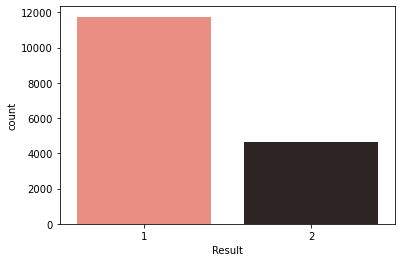

In [10]:
sns.countplot(x="Result",  palette="dark:salmon_r",data = df)

Number of patients that are male:  11414
Number of patients that are female:  4975


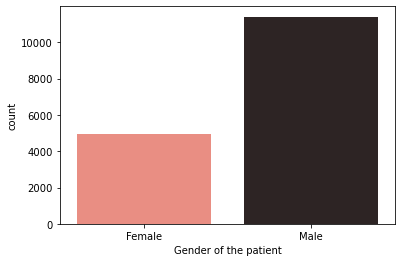

In [11]:

# Plotting the Number of Male and Female patients
sns.countplot(data=df, x = 'Gender of the patient', label='Count', palette="dark:salmon_r")

M, F = df['Gender of the patient'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

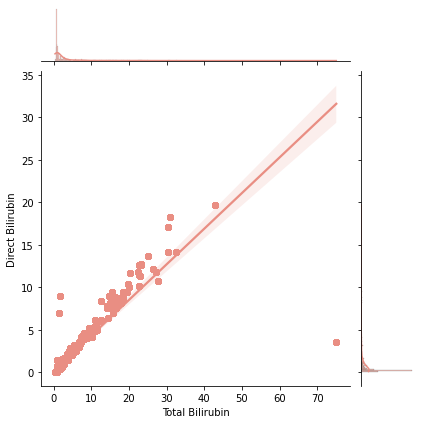

In [12]:
# Plotting Total_Bilirubin vs Direct_Bilirubin


sns.jointplot(data=df, x="Total Bilirubin", y="Direct Bilirubin",kind="reg", scatter = True, color="#E98E83")


**Histogram**

'df.hist(figsize=(20,20), xrot=-45, bins=10)\nplt.show()'

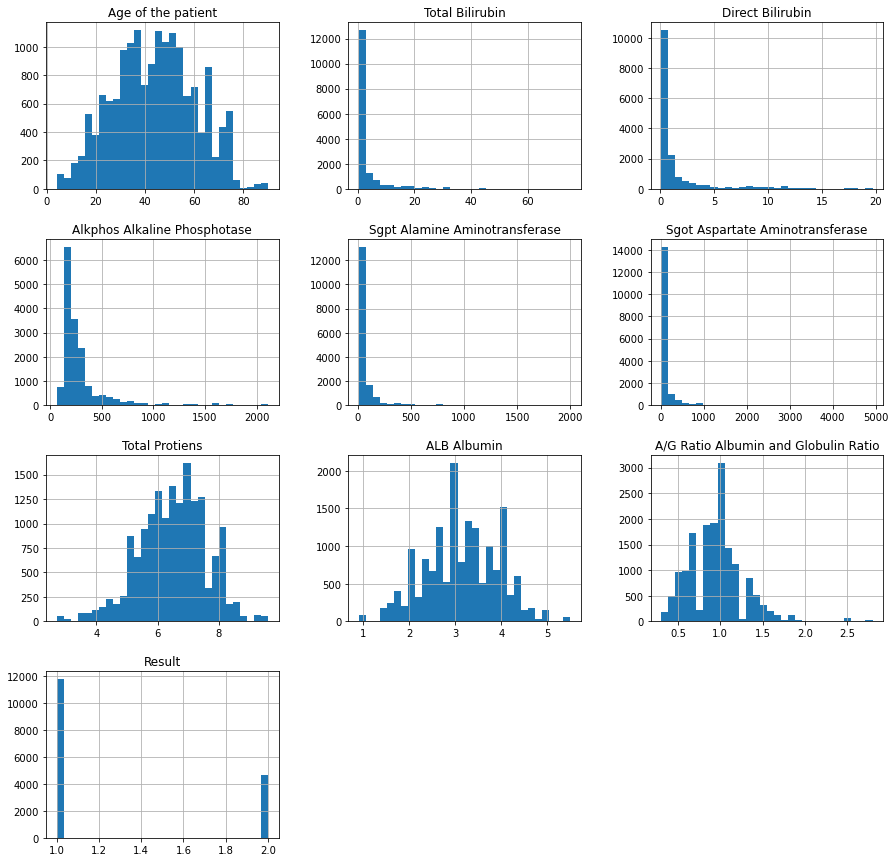

In [13]:
df.hist(figsize=(15,15), bins=30, xlabelsize=10, ylabelsize=10);

'''df.hist(figsize=(20,20), xrot=-45, bins=10)
plt.show()'''

**Correlation**

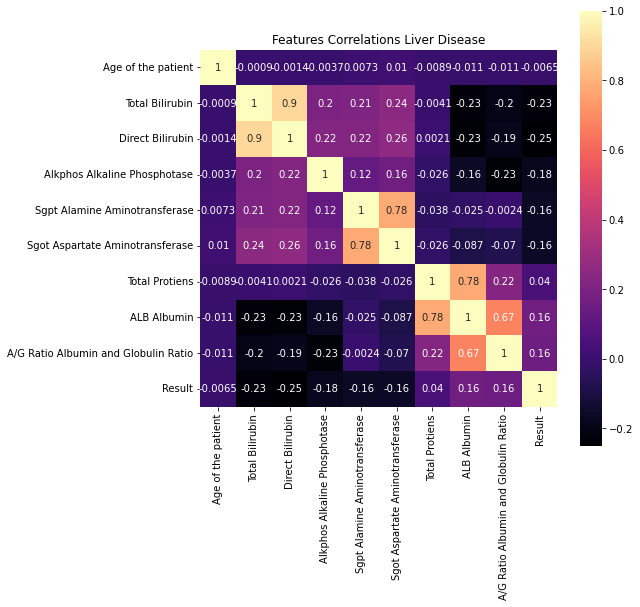

In [14]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),linecolor='black',vmax=1.0,square=True,cmap="magma",annot=True)
plt.title('Features Correlations Liver Disease')
plt.show()

**Label Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder
labelE = LabelEncoder()
df['Gender of the patient'] = labelE.fit_transform(df['Gender of the patient'])

In [16]:
df.sample(5)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
10848,42.0,1,0.8,0.2,150.0,25.0,23.0,7.5,3.9,1.0,1
15679,13.0,1,15.0,8.2,289.0,58.0,80.0,5.3,2.2,0.7,1
1233,49.0,1,1.8,0.8,215.0,53.0,58.0,6.4,3.8,1.4,1
11161,32.0,1,1.6,1.0,588.0,74.0,113.0,7.3,2.4,0.4,1
13066,33.0,1,7.1,3.3,258.0,80.0,113.0,6.2,2.9,0.8,1


**X and y seperation**

In [17]:
x = df.drop('Result',axis = 1)
y = df['Result']

In [18]:
print(x.shape)
print(y.shape)

(16389, 10)
(16389,)


**standardScaler**

In [19]:
standardScaler = StandardScaler()
X = standardScaler.fit_transform(x)

df = pd.DataFrame(X, columns = x.columns)
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
0,1.284379,-1.514685,-0.428513,-0.494194,-0.430926,-0.356365,-0.332674,0.286374,0.205832,-0.144163
1,1.102880,0.660203,1.214391,1.371433,1.694096,-0.089705,-0.040503,0.928272,0.079884,-0.639018
2,1.102880,0.660203,0.634543,0.887752,0.826655,-0.111926,-0.154521,0.469773,0.205832,-0.175091
3,0.860881,0.660203,-0.380192,-0.390548,-0.451679,-0.367475,-0.325548,0.286374,0.331779,0.165122
4,1.707878,0.660203,0.086908,0.162230,-0.397723,-0.295255,-0.186589,0.744872,-0.927696,-1.690585


# **Dataset spliting**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10980, 10)
(5409, 10)
(10980,)
(5409,)


# **Modeling With Hyperparameter Tuning**

# **KNN**

In [22]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = len(X_train)/3, num = 5)]
weights = ['uniform', 'distance']
algorithm  = ["auto","ball_tree","kd_tree","brute"]
leaf_size  = [int(x) for x in np.linspace(10, 100, num = 5)]
p  = [1,2]       

random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'leaf_size': leaf_size,
               'p': p}

knn_clf = KNeighborsClassifier()
knn_random = RandomizedSearchCV(estimator = knn_clf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2,random_state=35, n_jobs = -1)
knn_random.fit(X_train, y_train)

knn_random.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 1,
 'leaf_size': 77,
 'algorithm': 'brute'}

Accuracy: 96.52431133296358
[[3792   96]
 [  92 1429]]


C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3888
           2       0.94      0.94      0.94      1521

    accuracy                           0.97      5409
   macro avg       0.96      0.96      0.96      5409
weighted avg       0.97      0.97      0.97      5409



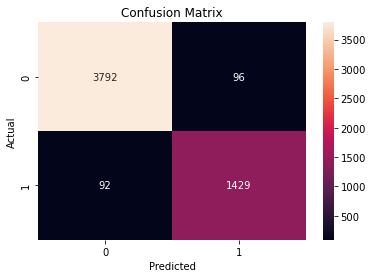

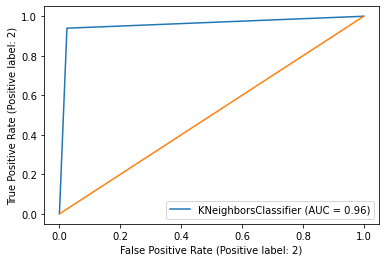

In [23]:
knn = KNeighborsClassifier(algorithm = 'brute',
 leaf_size = 77,
 n_neighbors = 1,
 p = 1,
 weights ='uniform')

knn.fit(X_train,y_train)

predKNN = knn.predict(X_test)
accuracyKNN= knn.score(X_test,y_test)*100
print("Accuracy:",accuracyKNN)

cmKNN = confusion_matrix(y_test, predKNN)
print(cmKNN)

sns.heatmap(cmKNN, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(knn, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,predKNN))

In [37]:
print ('R Squared =',r2_score(y_test, predKNN))
print ('MAE =',mean_absolute_error(y_test, predKNN))
print ('MSE =',mean_squared_error(y_test, predKNN))

R Squared = 0.8280431977013174
MAE = 0.03475688667036421
MSE = 0.03475688667036421


# **Random Forest**

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop= 5000, num = 25)]
max_features = ['auto','sqrt','log2']
max_depth = [int(x) for x in np.linspace(start = 200, stop= 5000, num = 20)]
min_samples_split = [5,10,12,15,20,50,100]
min_samples_leaf = [6,8,10,15,20,50,100]
#creat ids
grids ={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'criterion':['gini', 'entropy']
}
rf=RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grids,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 4400,
 'min_samples_split': 12,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 4242,
 'criterion': 'gini'}

AccuracyRF: 99.98151229432428
[[3887    1]
 [   0 1521]]


C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3888
           2       1.00      1.00      1.00      1521

    accuracy                           1.00      5409
   macro avg       1.00      1.00      1.00      5409
weighted avg       1.00      1.00      1.00      5409



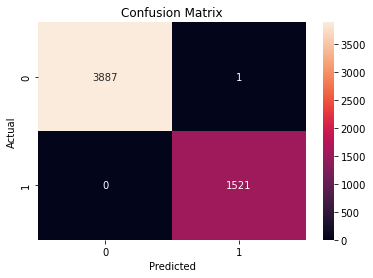

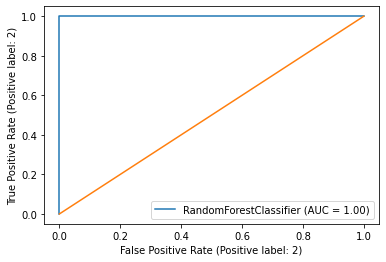

In [48]:
rf = RandomForestClassifier(n_estimators = 4400, min_samples_split = 12,
 min_samples_leaf = 8,
 max_features ='sqrt',
 max_depth= 4242,
 criterion='gini')

rf.fit(X_train, y_train)

ypredRF = rf.predict(X_test)
accuracyRF= rf.score(X_test,y_test)*100
print("AccuracyRF:",accuracyRF)

cmRF = confusion_matrix(y_test, ypredRF)
print(cmRF)

sns.heatmap(cmRF, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(rf, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,ypredRF))

In [49]:
print ('R Squared =',r2_score(y_test, ypredRF))
print ('MAE =',mean_absolute_error(y_test, ypredRF))
print ('MSE =',mean_squared_error(y_test, ypredRF))

R Squared = 0.9990853361579858
MAE = 0.00018487705675725643
MSE = 0.00018487705675725643


# **SVM**

In [24]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install stats

Note: you may need to restart the kernel to use updated packages.


In [26]:
from scipy import stats
from scipy.stats import randint

param_grid= param_grid= {
            "C": stats.uniform(2, 10),
            "gamma": stats.uniform(0.1, 1),
            "kernel": ['rbf', 'linear', 'poly'], 
            "class_weight" :['balanced', None]
}

svm = SVC()
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = param_grid, n_iter = 100, n_jobs = 4, cv = 3, random_state = 100)
svm_random.fit(X_train, y_train)

svm_random.best_params_

{'C': 6.028803313791421,
 'class_weight': None,
 'gamma': 0.9745325095997327,
 'kernel': 'rbf'}

Accuracy SVM: 86.46699944536883
[[3644  244]
 [ 488 1033]]


C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           1       0.88      0.94      0.91      3888
           2       0.81      0.68      0.74      1521

    accuracy                           0.86      5409
   macro avg       0.85      0.81      0.82      5409
weighted avg       0.86      0.86      0.86      5409



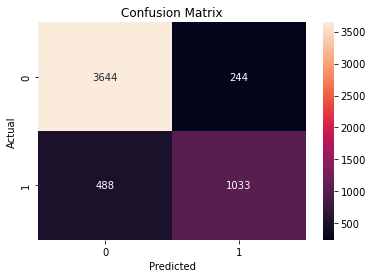

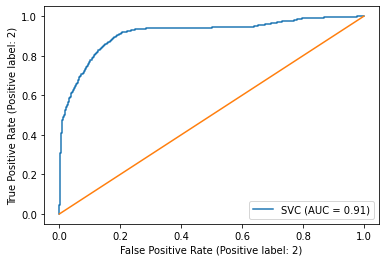

In [27]:
svm = SVC(C = 6.028803313791421, class_weight = None, gamma = 0.9745325095997327, kernel = 'rbf')

svm.fit(X_train,y_train)

predSVM = svm.predict(X_test)
accuracy = svm.score(X_test,y_test)*100
print("Accuracy SVM:",accuracy)

cmSVM = confusion_matrix(y_test, predSVM)
print(cmSVM)

sns.heatmap(cmSVM, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(svm, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,predSVM))

In [39]:
print ('R Squared =',r2_score(y_test, predSVM))
print ('MAE =',mean_absolute_error(y_test, predSVM))
print ('MSE =',mean_squared_error(y_test, predSVM))

R Squared = 0.33046606764555486
MAE = 0.1353300055463117
MSE = 0.1353300055463117


# Decision Tree

In [28]:
max_depth = [int(x) for x in np.linspace(start = 500, stop= 10000, num = 10)]
params = {
    'max_depth': max_depth,
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"],
    'splitter' : ['best','random'],
    'min_samples_split': [50,100,500,1000,1200,1500]
}

dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = params,
               n_iter = 200, cv = 5, verbose=2, random_state=35, n_jobs = -1)


dt_random.fit(X_train, y_train)

dt_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'splitter': 'best',
 'min_samples_split': 50,
 'min_samples_leaf': 5,
 'max_depth': 10000,
 'criterion': 'gini'}

Accuracy DT: 97.65206137918284
[[3828   60]
 [  67 1454]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3888
           2       0.96      0.96      0.96      1521

    accuracy                           0.98      5409
   macro avg       0.97      0.97      0.97      5409
weighted avg       0.98      0.98      0.98      5409



C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


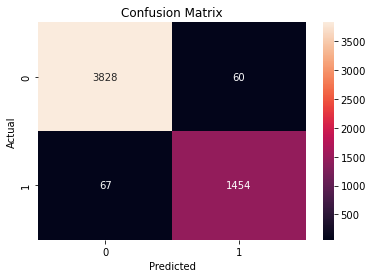

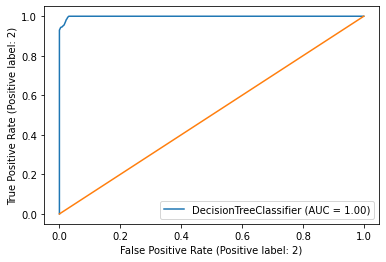

In [29]:
dt = DecisionTreeClassifier(splitter = 'best', min_samples_split = 50, 
                            max_depth = 10000,  min_samples_leaf = 5, criterion = 'gini')
dt.fit(X_train, y_train)

PredDT = dt.predict(X_test)
accuracy = dt.score(X_test, y_test)*100
print("Accuracy DT:",accuracy)

cmDT = confusion_matrix(y_test, PredDT)
print(cmDT)


sns.heatmap(cmDT, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(dt, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,PredDT))

In [40]:
print ('R Squared =',r2_score(y_test, PredDT))
print ('MAE =',mean_absolute_error(y_test, PredDT))
print ('MSE =',mean_squared_error(y_test, PredDT))

R Squared = 0.8838376920641878
MAE = 0.023479386208171565
MSE = 0.023479386208171565


# XGBoost

In [30]:
param_grid_xg = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [int(x) for x in np.linspace(start = 200, stop= 10000, num = 25)]
}

xgb = XGBClassifier()

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = param_grid_xg, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)

xgb_random.fit(X_train, y_train)

best_parameters = xgb_random.best_params_
best_parameters

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.9,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 8366,
 'min_child_weight': 3.0,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.25,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.6}

[22:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accurac XGB: 100.0
[[3888    0]
 [   0 1521]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3888
           2       1.00      1.00      1.00      1521

    accuracy                           1.00      5409
   macro av

C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


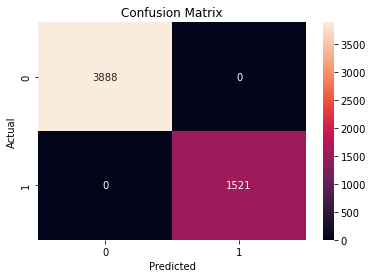

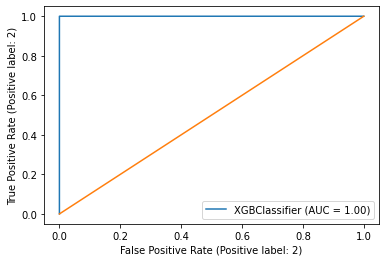

In [31]:
xgb = XGBClassifier(
      colsample_bylevel = 0.6,
      colsample_bytree=0.6,
      gamma = 0.25,
      learning_rate = 0.2,
      max_depth = 10,
      min_child_weight = 3.0,
      n_estimators = 8366,
      reg_lambda = 0.1,
      silent=False,
      subsample = .9)

xgb.fit(X_train,y_train)
predXG = xgb.predict(X_test)

accuracyXg= xgb.score(X_test,y_test)*100
print('Accurac XGB:',accuracyXg)

cmXGB = confusion_matrix(y_test, predXG)
print(cmXGB)

sns.heatmap(cmXGB, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(xgb, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,predXG))

In [36]:
print ('R Squared =',r2_score(y_test, predXG))
print ('MAE =',mean_absolute_error(y_test, predXG))
print ('MSE =',mean_squared_error(y_test, predXG))

R Squared = 1.0
MAE = 0.0
MSE = 0.0


# Logistic Regression

In [41]:
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'tol':[0.01, 0.001, 0.0001, 0.00001],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

lor = LogisticRegression()
lor_random = RandomizedSearchCV(estimator=lor, param_distributions = LRparam_grid, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)

lor_random.fit(X_train, y_train)

lor_random.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_so

{'tol': 0.01, 'solver': 'sag', 'penalty': 'l2', 'max_iter': 400, 'C': 1000}

Accuracy Lor: 72.8970234793862
[[3647  241]
 [1225  296]]
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      3888
           2       0.55      0.19      0.29      1521

    accuracy                           0.73      5409
   macro avg       0.65      0.57      0.56      5409
weighted avg       0.69      0.73      0.68      5409



C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


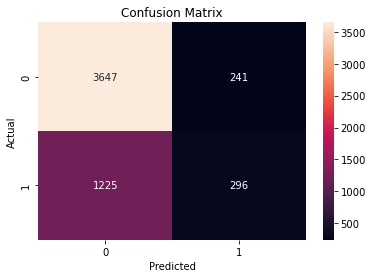

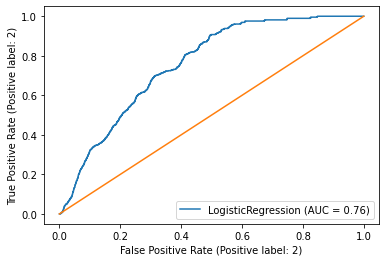

In [42]:
lor = LogisticRegression(tol = 0.01, solver = 'sag', C = 1000, max_iter = 400, penalty ="l2")

lor.fit(X_train,y_train)

predLOR = lor.predict(X_test)
accuracyLor = lor.score(X_test,y_test)*100
print("Accuracy Lor:",accuracyLor)

cmLOR = confusion_matrix(y_test, predLOR)
print(cmLOR)

sns.heatmap(cmLOR, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(lor, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,predLOR))

In [43]:
print ('R Squared =',r2_score(y_test, predLOR))
print ('MAE =',mean_absolute_error(y_test, predLOR))
print ('MSE =',mean_squared_error(y_test, predLOR))

R Squared = -0.34089719239291894
MAE = 0.2710297652061379
MSE = 0.2710297652061379


# **AdaBoostClassifier**

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ADB_grid = {
    'n_estimators':[int(x) for x in np.linspace(start = 50, stop= 100, num = 25)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'algorithm':['SAMME.R', 'SAMME'],
}

adb = AdaBoostClassifier()
adb_random = RandomizedSearchCV(estimator=adb, param_distributions = ADB_grid, n_iter = 25, scoring = 'accuracy', error_score = 0, cv = 3, verbose = 3, n_jobs = -1)

adb_random.fit(X_train, y_train)

adb_random.best_params_


Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'n_estimators': 97, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}

Accuracy NB 77.92567942318358
[[3580  308]
 [ 886  635]]
              precision    recall  f1-score   support

           1       0.80      0.92      0.86      3888
           2       0.67      0.42      0.52      1521

    accuracy                           0.78      5409
   macro avg       0.74      0.67      0.69      5409
weighted avg       0.77      0.78      0.76      5409



C:\Users\PC\anaconda3\envs\dLGPU\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


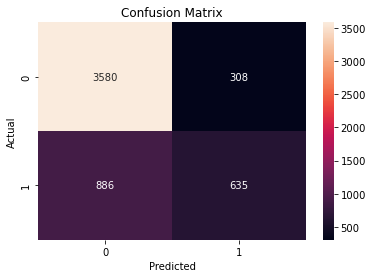

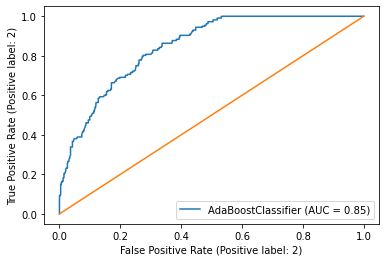

In [45]:
adb = AdaBoostClassifier(n_estimators = 97, learning_rate = 0.3, algorithm = 'SAMME.R')
adb.fit(X_train,y_train)

ypredADB= adb.predict(X_test)
accuracy = adb.score(X_test,y_test)*100
print("Accuracy NB",accuracy)

cmADB = confusion_matrix(y_test, ypredADB)
print(cmADB)

sns.heatmap(cmADB, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

roc = plot_roc_curve(adb, X_test, y_test)
print(roc)
plt.plot([0,1],[0,1])

print(classification_report(y_test,ypredADB))

In [46]:
print ('R Squared =',r2_score(y_test, ypredADB))
print ('MAE =',mean_absolute_error(y_test, ypredADB))
print ('MSE =',mean_squared_error(y_test, ypredADB))

R Squared = -0.09210862736503755
MAE = 0.22074320576816417
MSE = 0.22074320576816417


# ANOVA feature selection 